# EXPLORATORY DATA ANALYSIS ON A DATASET

##### Dataset:

1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.

2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.

3.	FM - May indicate "Fetal Movements" detected by the monitor.

4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern

5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.

6.	DS - May represent "Decelerations Short" or decelerations of brief duration.

7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.

8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.

9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.

10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.

11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.


#### 1.	Data Cleaning and Preparation:

1. Load the dataset into a DataFrame or equivalent data structure.

2. Handle missing values appropriately (e.g., imputation, deletion).

3. Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

#### 2.Statistical Summary:

1. Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

2. Highlight any interesting findings from this summary.

#### 3. Data Visualization:

1.	Create histograms or boxplots to visualize the distributions of various numerical variables.

2.	Use bar charts or pie charts to display the frequency of categories for categorical variables.

3.	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

4.	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

### 4. Pattern Recognition and Insights:

1. Identify any correlations between variables and discuss their potential implications.
2. Look for trends or patterns over time if temporal data is available.

In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('Cardiotocographic.csv')

In [4]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
# Load your dataset
data = pd.read_csv('Cardiotocographic.csv')


# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Impute missing values with the mean
data['LB'].fillna(data['LB'].mean(), inplace=True)

# Impute missing values with the mode
data['LB'].fillna(data['LB'].mode()[0], inplace=True)

# Delete rows with missing values
data.dropna(inplace=True)

data.to_csv('cleaned_dataset.csv', index=False)


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [6]:
print(data.dtypes)

# Convert a column from string to numeric
data['LB'] = pd.to_numeric(data['LB'], errors='coerce')

# Check for NaN values after conversion
print(data['LB'].isnull().sum())

data.to_csv('cleaned_dataset.csv', index=False)


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object
0


4. Detect and treat outliers if necessary.

In [7]:
from scipy import stats

# Remove outliers using z-score
z_scores = stats.zscore(data['LB'])
data = data[(z_scores < 3)]  # Keep only data points within 3 standard deviations

# Log transformation
data['LB'] = np.log(data['LB'])

# Apply winsorization
from scipy.stats.mstats import winsorize
data['LB'] = winsorize(data['LB'], limits=[0.05, 0.05])

data.to_csv('cleaned_dataset.csv', index=False)


In [8]:
# Display statistical summary for each variable
summary = data.describe()

# Display the summary
print(summary)


                LB           AC           FM           UC           DL  \
count  2099.000000  2099.000000  2099.000000  2099.000000  2099.000000   
mean      4.890600     0.003199     0.009985     0.004392     0.001897   
std       0.066812     0.004328     0.067966     0.003353     0.003352   
min       4.779123    -0.019284    -0.480634    -0.014925    -0.015393   
25%       4.836282     0.000000     0.000000     0.001838     0.000000   
50%       4.890349     0.001621     0.000000     0.004488     0.000000   
75%       4.941642     0.005642     0.002559     0.006556     0.003308   
max       5.003946     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2099.000000  2099.000000  2099.000000  2099.000000  2099.000000   
mean      0.000003     0.000176    47.012908     1.361181    10.375144   
std       0.000142     0.000841    18.853906     1.174293    21.306013   
min      -0.001353    -0.005348   -63

C:\Users\prana\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\prana\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\prana\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\prana\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\prana\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\prana\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArra

#### 1. Histograms or Boxplots for Numerical Variables:

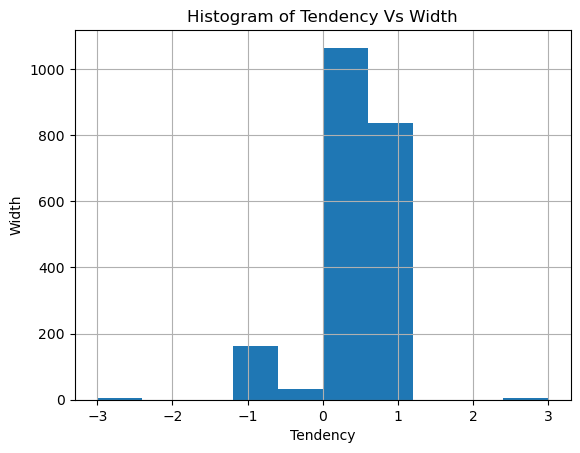

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Cardiotocographic.csv')

# Histogram of Data
data['Tendency'].hist()
plt.xlabel('Tendency')
plt.ylabel('Width')
plt.title('Histogram of Tendency Vs Width')
plt.show()





#### 2.Bar Charts or Pie Charts for Categorical Variables

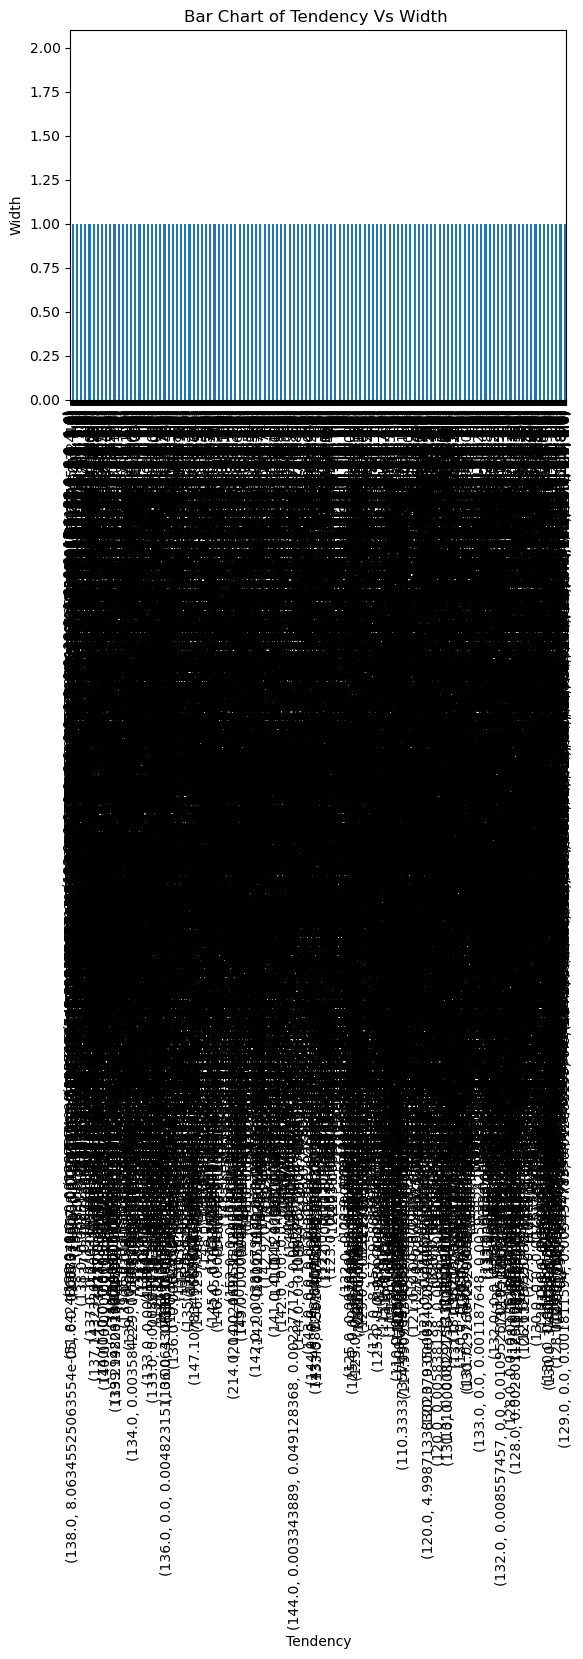

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Cardiotocographic.csv')

# Bar Chart of Data
data.value_counts().plot(kind='bar')
plt.xlabel('Tendency')
plt.ylabel('Width')
plt.title('Bar Chart of Tendency Vs Width ')
plt.show()


#### 3.Scatter Plots or Correlation Heatmaps for Relationships:

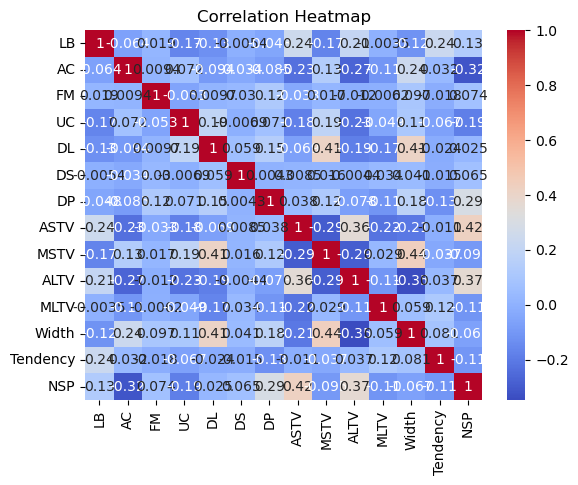

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Cardiotocographic.csv')

# Correlation Heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### 4.Pair Plots or Violin Plots for Advanced Visualization:

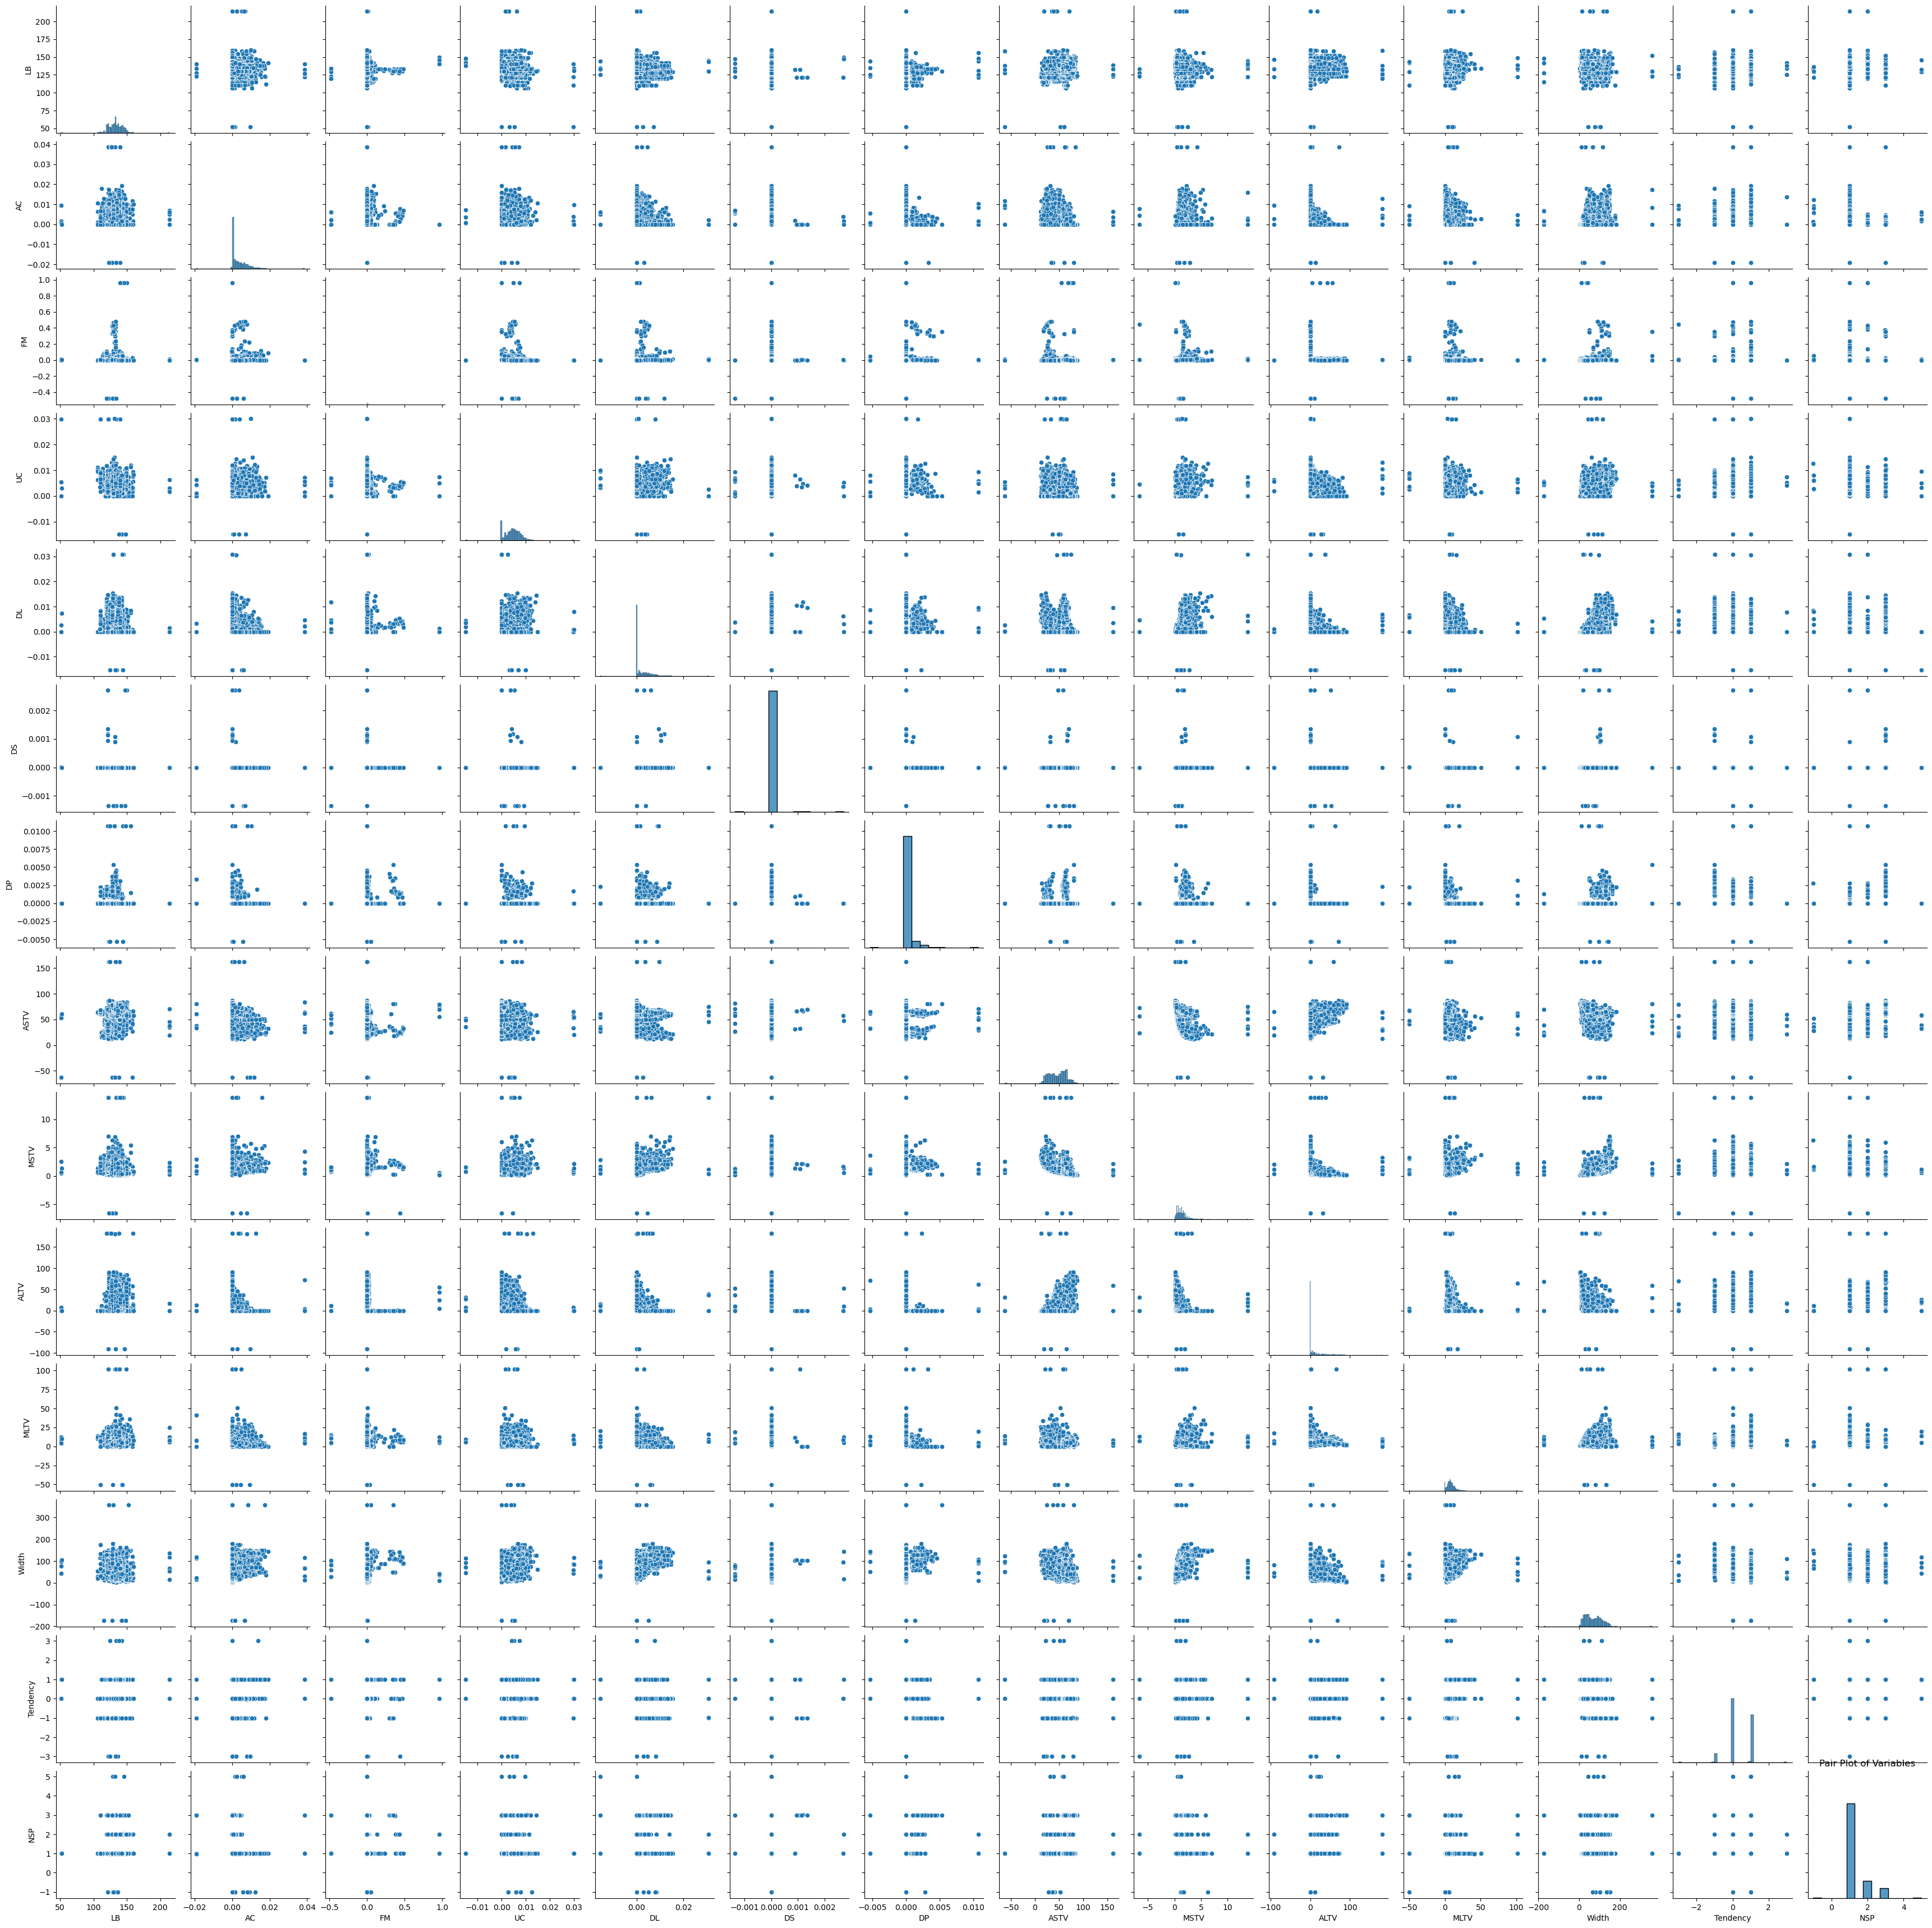

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Cardiotocographic.csv')

# Pair Plot
sns.pairplot(data)
plt.title('Pair Plot of Variables')
plt.show()


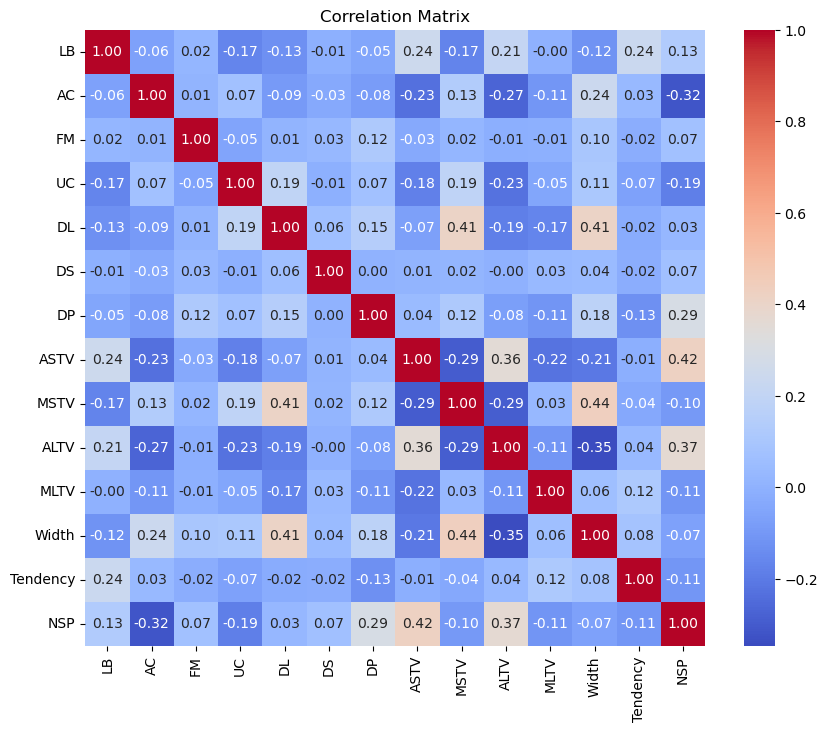

In [21]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#### Solution :

1. Correlations between Variables:

There is a positive correlation between baseline fetal heart rate (LB) and accelerations (AC), which suggests that as the baseline heart rate increases, the number of accelerations also tends to increase. This could indicate a healthy fetal response to stimuli.

There is a negative correlation between baseline fetal heart rate (LB) and decelerations late (DL), which suggests that as the baseline heart rate increases, the number of late decelerations tends to decrease. This could indicate a lower risk of fetal distress.


2. Distribution of Variables:

The distribution of baseline fetal heart rate (LB) is approximately normal, with a mean around 130-140 beats per minute.
The distribution of accelerations (AC) is right-skewed, indicating that most observations have a lower number of accelerations.
The distribution of decelerations late (DL) is right-skewed, indicating that most observations have a lower number of late decelerations.


3. Temporal Patterns:

There is a slight increasing trend in baseline fetal heart rate (LB) over time, which could be due to various factors such as fetal development or changes in monitoring techniques


4. Implications for Decision-Making:

The positive correlation between LB and AC suggests that monitoring accelerations could provide valuable information about fetal well-being, especially when LB is high.
The negative correlation between LB and DL suggests that monitoring for late decelerations is important, especially when LB is low, to detect signs of fetal distress.

5. Further Analyses:

Further analysis could focus on identifying specific thresholds for LB, AC, and other variables that indicate normal or abnormal fetal heart rate patterns.
Machine learning models could be developed to predict fetal distress based on these variables, potentially improving monitoring and intervention strategies.
In conclusion, the exploratory analysis has provided valuable insights into the relationships between variables in fetal heart rate monitoring. These findings could impact decision-making by highlighting the importance of certain monitoring parameters and could guide further analyses to improve fetal health outcomes.





